In [1]:
import pandas as pd
import matplotlib
from scipy.stats import pearsonr
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import os
import wrangle

In [2]:
df = wrangle.wrangle_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19448 entries, 0 to 19447
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age_group   19448 non-null  object 
 1   gender      19448 non-null  object 
 2   month       19448 non-null  object 
 3   cause       19448 non-null  object 
 4   cause_code  19448 non-null  object 
 5   deaths      19448 non-null  int64  
 6   year        19448 non-null  object 
 7   population  19448 non-null  int64  
 8   crude_rate  19448 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 1.5+ MB


In [3]:
df.head()

,age_group,gender,month,cause,cause_code,deaths,year,population,crude_rate
0,01,Female,2020/01,#Influenza and pneumonia (J09-J18),GR113-076,12,2020,1826869,0.000007
1,01,Female,2020/01,#Certain conditions originating in the perinat...,GR113-108,424,2020,1826869,0.000232
2,01,Female,2020/01,"#Congenital malformations, deformations and ch...",GR113-109,174,2020,1826869,0.000095
3,01,Female,2020/01,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,36,2020,1826869,0.000020
4,01,Female,2020/01,"#Assault (homicide) (*U01-*U02,X85-Y09,Y87.1)",GR113-127,14,2020,1826869,0.000008


In [4]:
covid = df[df['cause'].str.contains('#COVID-19')]
covid.head(1)

,age_group,gender,month,cause,cause_code,deaths,year,population,crude_rate
346,15-24,Female,2020/04,#COVID-19 (U07.1),GR113-137,26,2020,20828241,0.000001


In [5]:
# create a pivot table with month as row and age group as column
pivot_covid_deaths = covid.pivot_table(index='month', columns='age_group', values='deaths', aggfunc='sum')    
pivot_covid_deaths.head()

age_group,01,01-04,05-14,15-24,25-34,35-44,45-54,55-64,65-74,75-84,85+
month,,,,,,,,,,,
2020/03,NaN,NaN,NaN,10.0,93.0,219.0,496.0,984.0,1528.0,1784.0,1629.0
2020/04,NaN,NaN,NaN,73.0,398.0,1050.0,3043.0,7545.0,13144.0,16786.0,19775.0
2020/05,NaN,NaN,NaN,43.0,207.0,544.0,1591.0,4072.0,7252.0,9008.0,12456.0
2020/06,NaN,NaN,NaN,35.0,159.0,384.0,1040.0,2154.0,3385.0,3948.0,4653.0
2020/07,NaN,NaN,NaN,86.0,311.0,805.0,1852.0,4124.0,6548.0,7313.0,7122.0


In [6]:
# create a pivot table with month as row and age group as column
pivot_covid_rate = covid.pivot_table(index='month', columns='age_group', values='crude_rate', aggfunc='sum')

In [7]:
# use the same age as covid, * note that the dataset has 0 deaths for under 15 years of age. 
# There is a note in the dataset about not releasing small amounts of data to inability to 
# anonymize the data. here is an interesting graph relating to the deaths by age group
# https://www.statista.com/statistics/1191568/reported-deaths-from-covid-by-age-us/
over_15= pivot_covid_rate.columns.tolist()


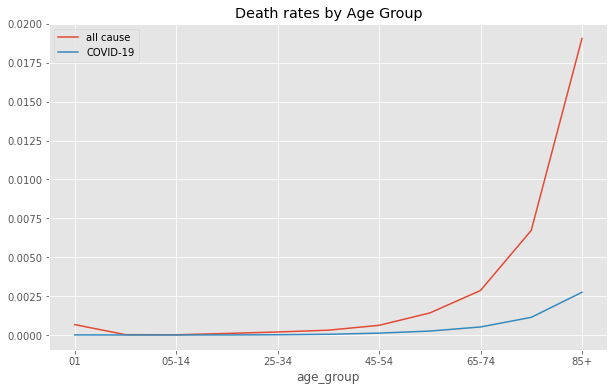

In [8]:
#create a pivot table with month as row and age group as column
pivot_all_cause_rate = df.pivot_table(index='month', columns='age_group', values='crude_rate', aggfunc='sum')
# #limit the pivot table to only the age groups over 15
# pivot_all_cause_rate = pivot_all_cause_rate[over_15]
# plot the pivot table
plt.figure(figsize=(10,6))
pivot_all_cause_rate.mean().plot(label='all cause')
pivot_covid_rate.mean().plot(label='COVID-19')
plt.legend()
plt.title('Death rates by Age Group')
plt.show()

Text(0.5, 1.0, 'Deaths by Age Group')

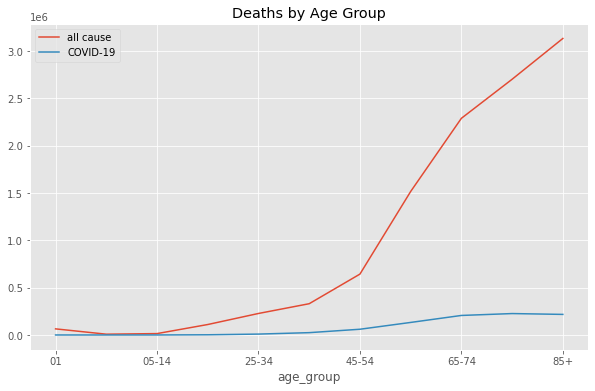

In [9]:
#create a pivot table with month as row and age group as column
pivot_all_cause_deaths = df.pivot_table(index='month', columns='age_group', values='deaths', aggfunc='sum')
# #limit the pivot table to only the age groups over 15
# pivot_all_cause_deaths = pivot_all_cause_deaths[over_15]
# plot the pivot table
plt.figure(figsize=(10,6))
pivot_all_cause_deaths.sum().plot(label='all cause')
pivot_covid_deaths.sum().plot(label='COVID-19')
plt.legend()
plt.title('Deaths by Age Group')

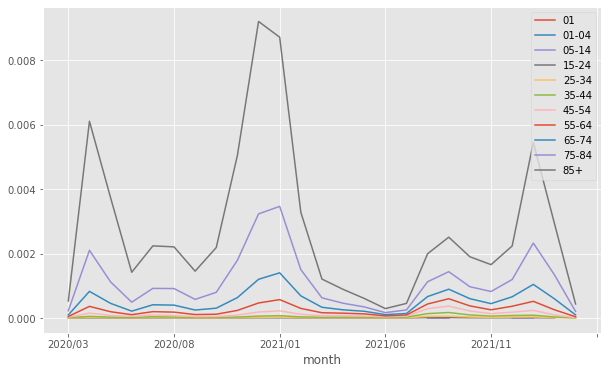

In [10]:
pivot_covid_rate.plot(figsize=(10,6))
# move legend to the top right
plt.legend(loc='upper right')
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '#Diseases of heart (I00-I09,I11,I13,I20-I51)'),
  Text(1, 0, '#Malignant neoplasms (C00-C97)'),
  Text(2, 0, '#COVID-19 (U07.1)'),
  Text(3, 0, '#Accidents (unintentional injuries) (V01-X59,Y85-Y86)'),
  Text(4, 0, '#Cerebrovascular diseases (I60-I69)')])

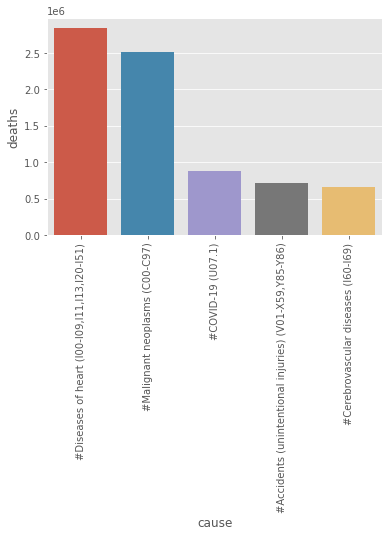

In [11]:
# top five causes of death
top_five_causes = df.groupby('cause').sum().sort_values(by='deaths', ascending=False).head(5)
top_five_causes.head()
sns.barplot(x=top_five_causes.index, y=top_five_causes['deaths'])
#rotate x labels
plt.xticks(rotation=90)

<AxesSubplot:xlabel='cause'>

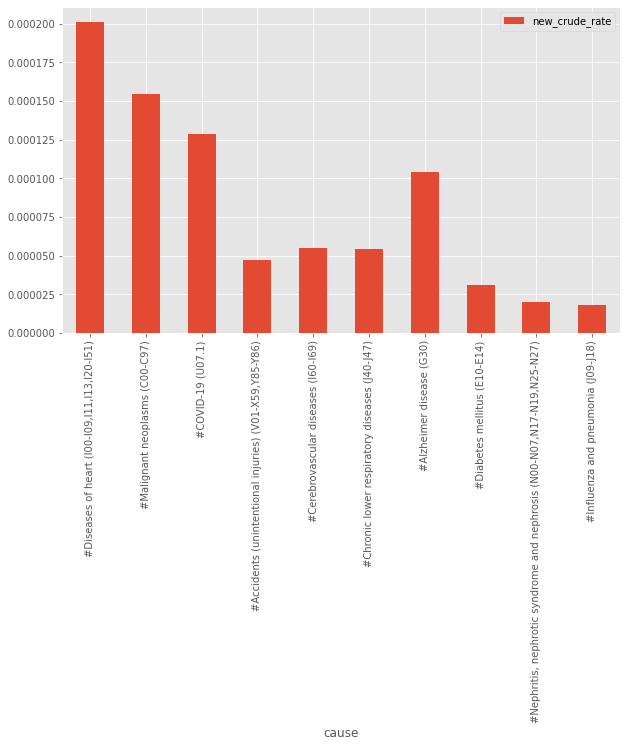

In [12]:
# top ten causes of death
top_ten_causes = df.groupby('cause').sum().sort_values(by='deaths', ascending=False).head(10)   
top_ten_causes['new_crude_rate'] = top_ten_causes.deaths/top_ten_causes.population
top_ten_causes.plot(y= 'new_crude_rate',kind='bar', figsize=(10,6))

# covid vs time

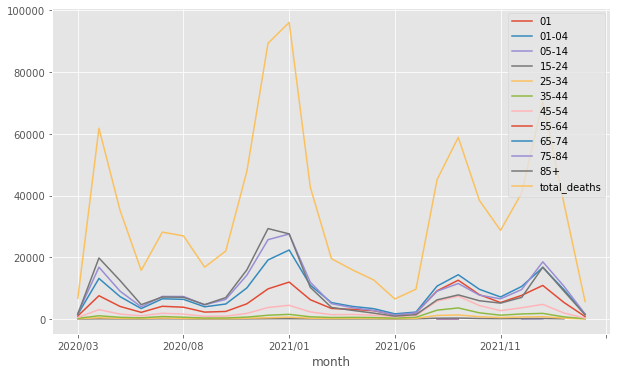

In [13]:
# add total deaths to pivot table
pivot_covid_deaths['total_deaths'] = pivot_covid_deaths.sum(axis=1)
# plot the pivot table
pivot_covid_deaths.plot(figsize=(10,6))
# move legend to the top right
plt.legend(loc='upper right')
plt.show()

 correlation between age group and covid

In [14]:
# Pull in covid death data from CDC with all ages by year grouped by month 
covid_all_ages = wrangle.prep_covid()

In [15]:
covid_all_ages.tail()

,age,month,gender,gender_code,deaths,year
3609,100,2022/01,Male,M,167,2022
3610,100,2022/02,Female,F,158,2022
3611,100,2022/02,Male,M,75,2022
3612,100,2022/03,Female,F,29,2022
3613,100,2022/03,Male,M,16,2022


Text(0.5, 1.0, 'Deaths by Age Group til Mar 2022')

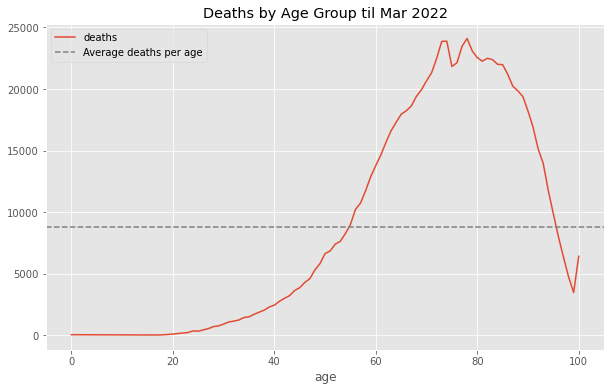

In [16]:
#groupby age and graph age vs death rate
covid_all_ages.groupby('age').sum()['deaths'].plot(figsize=(10,6))
#spike at 100 is due to 100+ age group is compressed into 1 data point
total_deaths = covid_all_ages.groupby('age').sum()['deaths'].sum()
avg_deaths_by_age = total_deaths/100
# add line to graph
plt.axhline(y=avg_deaths_by_age, color='grey', linestyle='--', label='Average deaths per age')
plt.legend()
plt.title('Deaths by Age Group til Mar 2022')



    Lets test this hypothesis

$H_0$ : There is no linear relationship between covid deaths and the age.
 
$H_A$ : There is a linear relationship between covid deaths and the age.

In [17]:
# alpha of 0.05 gives us 95% confidence interval
# can reject null if the p-value is less than 0.05
# since we are comparing two continuous variables, 
# we can use the pearson R test

# use pearsonr to find the correlation between the covid deaths and age
corr, p = pearsonr(covid_all_ages['age'], covid_all_ages['deaths'])
print(f'The correlation between age and deaths is {corr} with a p-value of {p}')
print('We can reject the null hypothesis due to the extremely low p-value')


The correlation between age and deaths is 0.3883672296092304 with a p-value of 1.9873347902245635e-130
We can reject the null hypothesis due to the extremely low p-value


~~$H_0$ : There is no linear relationship between covid deaths and the age.~~
 
$H_A$ : There is a linear relationship between covid deaths and the age.

    Age is strongly correlated with covid deaths

 correlation between gender and covid 
  


<AxesSubplot:title={'center':'Covid Deaths by Gender'}, xlabel='gender'>

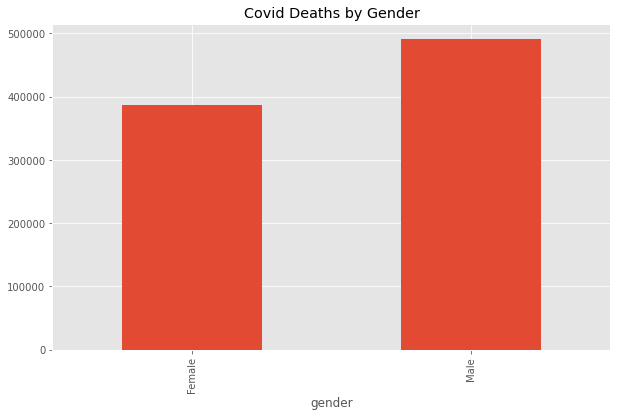

In [18]:
# plot the covid deaths vs gender
covid_all_ages.groupby('gender').sum()['deaths'].plot(figsize=(10,6), kind='bar', title= "Covid Deaths by Gender")


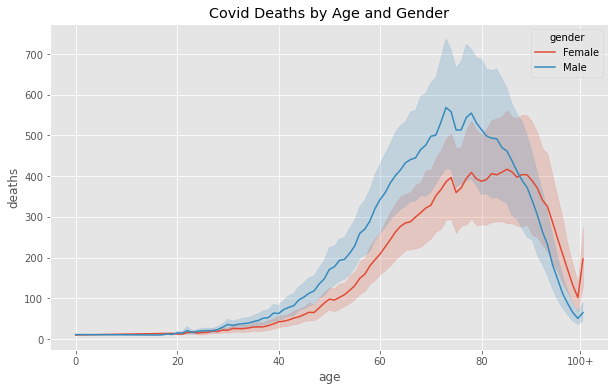

In [28]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=covid_all_ages, x= 'age', y= 'deaths', hue= 'gender')
plt.title("Covid Deaths by Age and Gender")
# set xticklabels
ax.set_xticks([0,20,40,60,80,99.5])
ax.set_xticklabels(['0','20','40','60','80','100+'])
plt.show()

    Lets test this hypothesis

$H_0$ : There is no correlation between covid deaths and the gender.
 
$H_A$ : There is  correlation between covid deaths and the gender.

In [31]:
# alpha of 0.05 gives us 95% confidence interval
# can reject null if the p-value is less than 0.05
# since we are comparing one continuous variable to a categorical variable,
# we can use the ttest

# use a ttest to find the correlation between the covid deaths and gender
male = covid_all_ages[covid_all_ages.gender == 'Male']
female = covid_all_ages[covid_all_ages.gender == 'Female']
test_stats = stats.ttest_ind(male.deaths, female.deaths)




NameError: name 'stats' is not defined

# avg age of covid death


In [ ]:
# what is the average age of death



# all deaths vs time



# covid, suicide, drugs, homicide vs time


 correlation between gender and above



# add more historical data



# predict future deaths

